In [91]:
#!pip install fastai
import pandas as pd
import tensorflow as tf
import re

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [92]:
df = pd.read_csv('../data/authors_poems_without_titles.csv')
df['Poems'] = df['Poems'].str.replace('\r', '')

In [76]:
def line_length(lines) :
    return max([len(x.split(' ')) for x in lines])

In [77]:
max_poem_size = df['Poems'].str.split('\n').map(line_length)
df_mod = df[max_poem_size <= 25]

In [78]:
poems = df_mod['Poems'].str.cat(sep='\n')
poems = poems.replace('\r', '')
poems = poems.replace('\n\n', '\n')
poems = poems.replace(',', '')
poems = poems.replace('.', '')
poems = poems.lower()
#print(repr(poems))
#print(poems)

In [ ]:
tokenizer = Tokenizer()
corpus = poems.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

In [81]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [85]:
print(tokenizer.word_index['firmamento'])
print(tokenizer.word_index['secas'])
print(tokenizer.word_index['fantasma'])
print(tokenizer.word_index['estrepar'])
print(tokenizer.word_index['afogado'])

2126
3385
3675
3693
3684


In [86]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [87]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 1293   51]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

In [89]:
print(xs.shape)
print(ys.shape)

(47923, 26)
(47923, 9233)


In [93]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
1498/1498 [==============================] - 94s 61ms/step - loss: 7.0499 - accuracy: 0.0604
Epoch 2/100
1498/1498 [==============================] - 105s 70ms/step - loss: 6.1102 - accuracy: 0.0990
Epoch 3/100
1498/1498 [==============================] - 101s 68ms/step - loss: 5.3477 - accuracy: 0.1250
Epoch 4/100
1498/1498 [==============================] - 97s 64ms/step - loss: 4.6328 - accuracy: 0.1637
Epoch 5/100
1498/1498 [==============================] - 92s 61ms/step - loss: 4.0847 - accuracy: 0.2081
Epoch 6/100
1498/1498 [==============================] - 109s 73ms/step - loss: 3.7101 - accuracy: 0.2488
Epoch 7/100
1498/1498 [==============================] - 99s 66ms/step - loss: 3.5177 - accuracy: 0.2731
Epoch 8/100
1498/1498 [==============================] - 112s 75ms/step - loss: 3.2965 - accuracy: 0.3002
Epoch 9/100
1498/1498 [==============================] - 100s 67ms/step - loss: 3.1451 - accuracy: 0.3191
Epoch 10/100
1498/1498 [==========================

In [94]:
model.save('trained_model')
model.save('modelHDF5', save_format='h5')

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [95]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

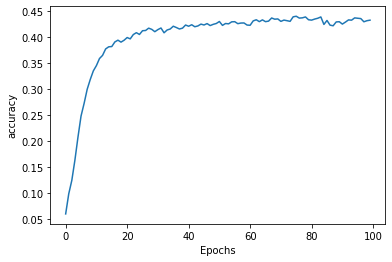

In [96]:
plot_graphs(history, 'accuracy')

In [107]:
seed_text = "Irmão, você tem que"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_index = np.argmax(predicted, axis=1)[0]
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            if index % 5 == 0:
                seed_text += "\n"
            break
    seed_text += " " + output_word
print(seed_text)

Irmão, você tem que vir comigo mesmo sem chegar mais fez feliz
 enganando a consciência nem
 fala mais que perfeito
 palavras tortas é o
 caminho da
 lança sé
 desfolhas estejam no comando qualquer homenagem ao celeste sentar andor
 era hora
 do recomeço qualquer
 tentação
 ou endereço
 de mais
 ou sorteeu
 chamo mais ajudada guerra dos
 ou se
 pro infernais sentar andor duendes permanente guerra lhe bastasse galinhas
 ou menos
 sábios
 ou se resume
 ou
 ou
 do fundo
 ou dourada ouvido teia real
 ou sobre no céu monumento vingar
 faça mais relicário distante e
 ou
 ou
 infiel vem trazer para
 ou
 ou sobre oca
 asneira
